In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv(r"C:\Users\midla\Downloads\heart_disease_data_updated.csv")
data

,Age,Gender,Cholesterol,RestingBP,Smoking,HeartDisease
0,68,Male,258.9,140.3,0,Unhealthy
1,58,Male,281.8,139.5,0,Unhealthy
2,44,Male,233.8,118.5,0,Healthy
3,72,Male,257.0,116.4,0,Unhealthy
4,37,Male,244.3,144.8,1,Unhealthy
...,...,...,...,...,...,...
295,62,Male,170.3,140.2,0,Healthy
296,53,Male,227.3,105.0,0,Healthy
297,40,Female,234.1,141.4,0,Healthy
298,78,Male,241.3,180.0,1,Unhealthy


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           300 non-null    int64  
 1   Gender        300 non-null    object 
 2   Cholesterol   300 non-null    float64
 3   RestingBP     300 non-null    float64
 4   Smoking       300 non-null    int64  
 5   HeartDisease  300 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 14.2+ KB


In [5]:
data.isnull().sum()

Age             0
Gender          0
Cholesterol     0
RestingBP       0
Smoking         0
HeartDisease    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
data['HeartDisease'].unique()

array(['Unhealthy', 'Healthy'], dtype=object)

In [11]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})

In [12]:
data['HeartDisease']=data['HeartDisease'].map({'Unhealthy':1,'Healthy':0})

In [13]:
data

,Age,Gender,Cholesterol,RestingBP,Smoking,HeartDisease
0,68,1,258.9,140.3,0,1
1,58,1,281.8,139.5,0,1
2,44,1,233.8,118.5,0,0
3,72,1,257.0,116.4,0,1
4,37,1,244.3,144.8,1,1
...,...,...,...,...,...,...
295,62,1,170.3,140.2,0,0
296,53,1,227.3,105.0,0,0
297,40,0,234.1,141.4,0,0
298,78,1,241.3,180.0,1,1


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data.corr()

,Age,Gender,Cholesterol,RestingBP,Smoking,HeartDisease
Age,1.000000,0.140139,0.037343,0.050159,-0.011595,0.444281
Gender,0.140139,1.000000,0.006445,-0.037548,-0.094642,0.047987
Cholesterol,0.037343,0.006445,1.000000,0.021727,0.019225,0.227699
RestingBP,0.050159,-0.037548,0.021727,1.000000,-0.079892,0.210548
Smoking,-0.011595,-0.094642,0.019225,-0.079892,1.000000,0.556600
HeartDisease,0.444281,0.047987,0.227699,0.210548,0.556600,1.000000


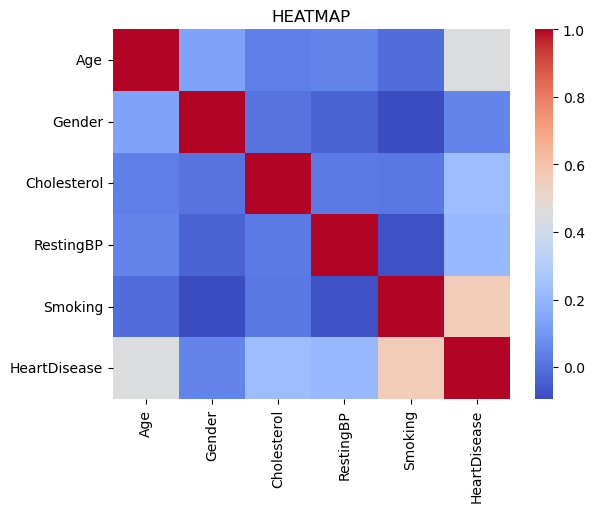

In [20]:
sns.heatmap(data.corr(),cmap='coolwarm')
plt.title("HEATMAP")
plt.show()

<h2>EDA</h2>

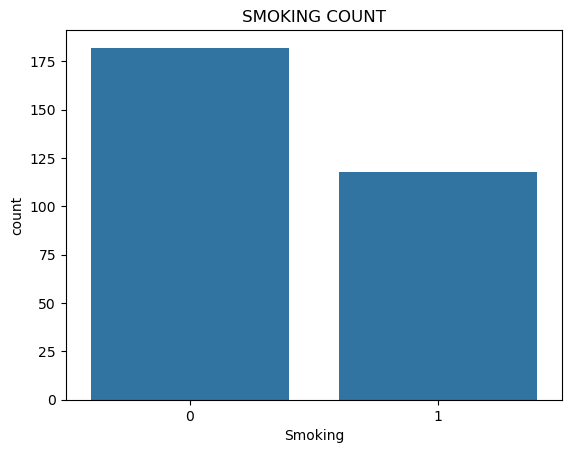

In [33]:
sns.countplot(x=data['Smoking'])
plt.title("SMOKING COUNT")
plt.show()

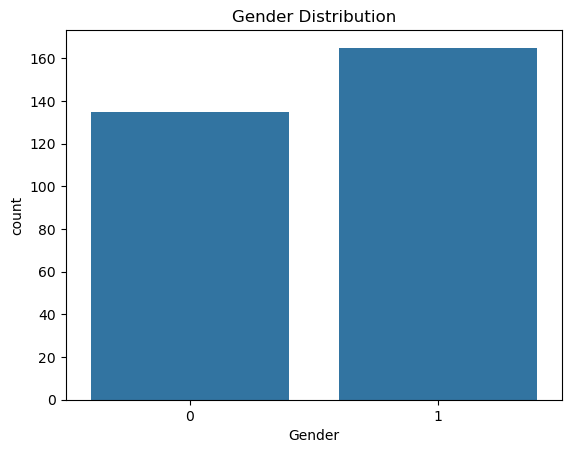

In [34]:
sns.countplot(x=data['Gender'])
plt.title("Gender Distribution")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

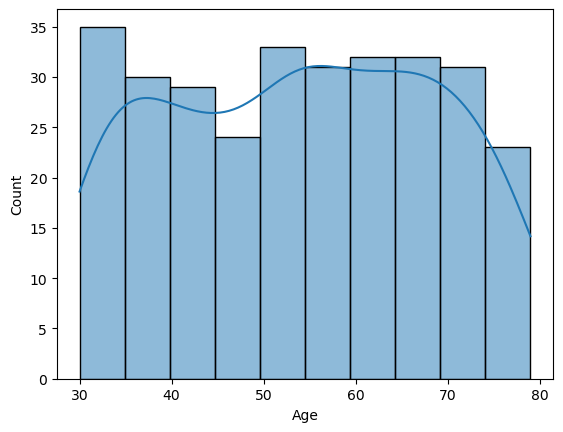

In [36]:
sns.histplot(data['Age'],kde='True')

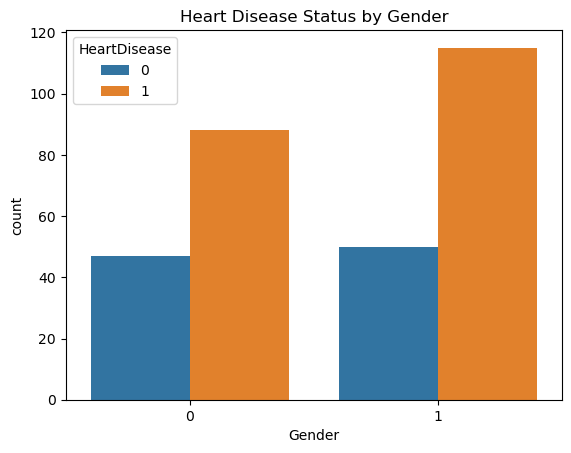

In [42]:
sns.countplot(x=data['Gender'],hue=data['HeartDisease'])
plt.title("Heart Disease Status by Gender")
plt.show()

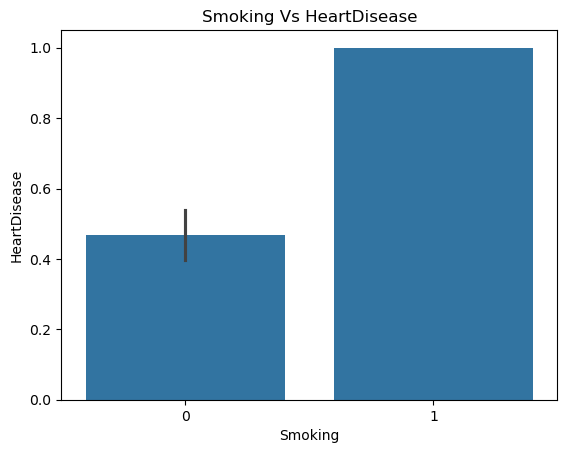

In [45]:
sns.barplot(data=data,x='Smoking',y='HeartDisease')
plt.title("Smoking Vs HeartDisease")
plt.show()

<Axes: xlabel='Age', ylabel='Cholesterol'>

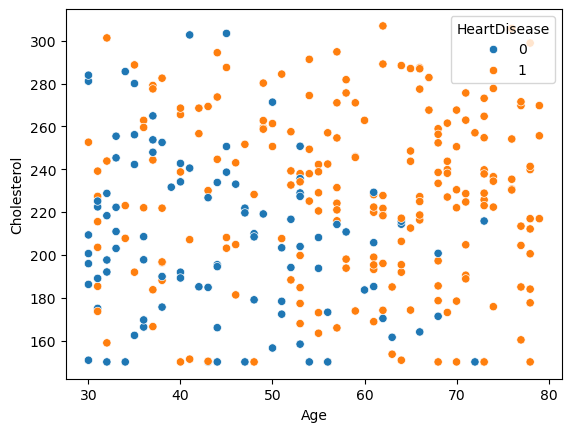

In [46]:
sns.scatterplot(data=data,x='Age',y='Cholesterol',hue='HeartDisease')

<h1>Regression</h1>

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [52]:
x=data.drop('HeartDisease',axis=1)
x

,Age,Gender,Cholesterol,RestingBP,Smoking
0,68,1,258.9,140.3,0
1,58,1,281.8,139.5,0
2,44,1,233.8,118.5,0
3,72,1,257.0,116.4,0
4,37,1,244.3,144.8,1
...,...,...,...,...,...
295,62,1,170.3,140.2,0
296,53,1,227.3,105.0,0
297,40,0,234.1,141.4,0
298,78,1,241.3,180.0,1


In [53]:
y=data['HeartDisease']
y

0      1
1      1
2      0
3      1
4      1
      ..
295    0
296    0
297    0
298    1
299    0
Name: HeartDisease, Length: 300, dtype: int64

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
ob1=LinearRegression()
ob1.fit(xtrain,ytrain)

LinearRegression()

<h2>PREDICTION</h2>

In [57]:
y_pred=ob1.predict(xtest)
y_pred

array([0.86276053, 0.77251451, 0.6171624 , 0.43968088, 0.64871392,
       0.80735342, 0.63892465, 1.04024222, 1.0244432 , 0.60656606,
       0.54825253, 1.34992416, 1.07267897, 0.23527915, 0.88110831,
       1.19225108, 0.20001663, 0.50781382, 0.44931293, 0.74964701,
       0.78994195, 0.79244479, 0.74805393, 1.18404496, 0.22814649,
       1.01710105, 0.84380155, 0.49064585, 0.51507111, 0.6174394 ,
       0.51820297, 1.39637275, 0.89812455, 0.64171856, 0.9082651 ,
       0.58074096, 0.77049633, 0.93298684, 0.13544478, 0.31245642,
       0.5330856 , 0.61808651, 0.81951363, 0.38107741, 0.64165992,
       0.71380877, 0.65297346, 0.27569683, 1.13323438, 0.09936091,
       0.49748269, 1.21045962, 0.19497339, 0.7190217 , 0.29383466,
       0.81996273, 0.00848833, 1.18886787, 0.45784924, 0.73804554])

In [59]:
sample=xtest.iloc[[3]]
sample

,Age,Gender,Cholesterol,RestingBP,Smoking
9,40,0,238.7,168.1,0


In [60]:
ob1.predict(sample)

array([0.43968088])

In [61]:
ytest.iloc[[3]]

9    1
Name: HeartDisease, dtype: int64

In [65]:
x.columns

Index(['Age', 'Gender', 'Cholesterol', 'RestingBP', 'Smoking'], dtype='object')

In [69]:
new_row =pd.dataframe[ {
    'Age': 55,
    'Gender': 0,
    'Cholesterol': 230.5,
    'RestingBP': 120.0,
    'Smoking': 1}]
ob1.predict(new_row)

AttributeError: module 'pandas' has no attribute 'dataframe'